<b>Artificial neural networks (ANNs)</b>

<b>

It comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. 

Each node, or artificial neuron, connects to another and has an associated weight and threshold.

If the output of any individual node is above the specified threshold value,that node is activated,sending data to the next layer of the network.

Otherwise, no data is passed along to the next layer of the network</b>

<b>

Neural networks rely on training data to learn and improve their accuracy over time. 

However,once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and 
artificial intelligence, allowing us to classify and cluster data at a high velocity.


Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts.</b.

<b>

Our network also has the output fed to it.

The predicted output is then compared with the actual output to calculate the error in the prediction. 

The magnitude of the error indicates how wrong we are and the sign suggests if our predicted values are higher or lower than expected.

This information is then relocated backward through our network.This is known as Back propagation. 

Based on this information the weights are adjusted. 

This cycle of forward propagation and backpropagation is iteratively performed with multiple inputs.

The process goes on until we get appropriate weights that produce correct output and predict our shape correctly.</b>


<b>Neurons </b>

A neuron or a node is a basic unit of neural networks that receives information, performs simple calculations, and passes it further. 

A layer consists of small individual units called neurons. 

A Building Blocks of Neural Networks neuron in a neural network can be better understood with the help of biological neurons.

An artificial neuron is similar to a biological neuron. 

It receives input from the other neurons, performs some processing, and produces an output.

<b>Synapses and weights :</b>

Synapses: 

A synapse is what connects the neurons like an electricity cable.Every synapse has a weight.

The weights also add to the changes in the input information. 

The results of the neuron with the greater weight will be dominant in the next neuron, while information from less ‘weighty’ neurons will not be passed over.

One can say that the matrix of weights governs the whole neural system

Inputs are the data that we pass into the model to get desired outputs, 

while the weights are the parameters that we’ll tune later on to get these results.

Weights are one of the types of values that change inside the model during the training phase, along with biases that also change during training.

<b>Bias</b>

A bias neuron allows for more variations of weights to be stored. 

Biases add richer representation of the input space to the model’s weights.

In the case of neural networks, a bias neuron is added to every layer. 

It plays a vital role by making it possible to move the activation function to the left or right on the graph.

It is true that ANNs can work without bias neurons. However, they are almost always added and counted as an indispensable part of the overall model.

<b>Layers</b>

A neural network is made up of vertically stacked components called Layers. 

Each dotted line in the image represents a layer. There are three types of layers in a Neural Network.

Input Layer : 
    
            First is the input layer. This layer will accept the data and pass it to the rest of the network.

Hidden Layer : 
            The second type of layer is called the hidden layer.
        
            Hidden layers are either one or more in number for a neural network.
            
            In the above case, the number is 1. 
            
            Hidden layers are the ones that are actually responsible for the excellent performance and complexity of neural networks.
            
            They perform multiple functions at the same time such as data transformation, automatic feature creation, etc.
            
Output layer : 
            
                The last type of layer is the output layer. The output layer holds the result or the output of the problem.
                
                Raw images get passed to the input layer and we receive output in the output layer.
                

The neuron basically sums each input multiplied by that input's weight, then add the bias.

All the neuron does is take the fractions of inputs, where these fractions (weights) are the adjustable parameters, and adds

another adjustable parameter — the bias — then outputs the result.

Neural networks typically have layers that consist of more than one neuron.

Layers are nothing more than groups of neurons. Each neuron in a layer takes exactly the same input — the input
given to the layer (which can be either the training data or the output from the previous layer),
but contains its own set of weights and its own bias, producing its own unique output.

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.6.0'

In [5]:
tf.keras.__version__

'2.6.0'

In [6]:
tf.config.list_physical_devices("GPU")

[]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
mnist = tf.keras.datasets.mnist

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 7s 1us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

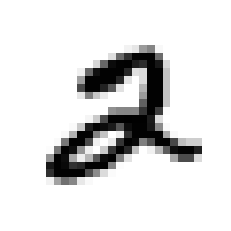

In [18]:
img  = X_train_full[5]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

In [19]:
img.max(), img.min()

(255, 0)

<AxesSubplot:>

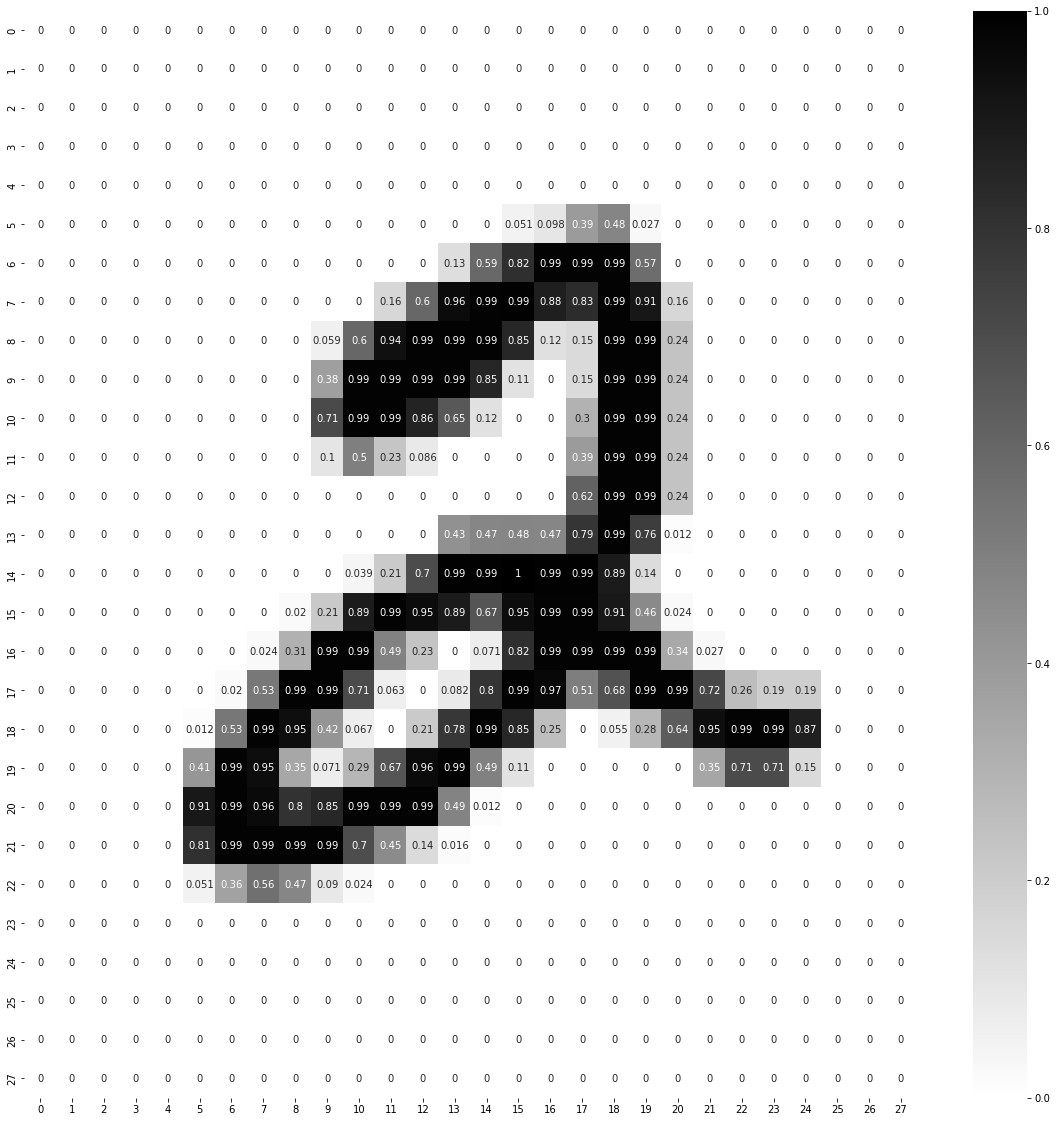

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [21]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.

In [22]:
X_valid.shape

(5000, 28, 28)

In [23]:
X_train.shape

(55000, 28, 28)

In [24]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [25]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [26]:
model_clf.layers

In [27]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [29]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6071 - accuracy: 0.8475 - val_loss: 0.3049 - val_accuracy: 0.9164
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.9189 - val_loss: 0.2388 - val_accuracy: 0.9328
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9343 - val_loss: 0.2032 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1976 - accuracy: 0.9445 - val_loss: 0.1744 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1718 - accuracy: 0.9520 - val_loss: 0.1569 - val_accuracy: 0.9576
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1519 - accuracy: 0.9577 - val_loss: 0.1479 - val_accuracy: 0.9598
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1363 - accuracy: 0.9614 - val_loss: 0.1281 - val_accuracy:

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
type(history.history)

dict

In [32]:
history.history

{'loss': [0.6071012020111084,
  0.2846970558166504,
  0.2321900725364685,
  0.19756963849067688,
  0.1717882752418518,
  0.15190275013446808,
  0.1362941563129425,
  0.12324831634759903,
  0.1114799752831459,
  0.10238072276115417,
  0.09380960464477539,
  0.0865173190832138,
  0.08009981364011765,
  0.07454445213079453,
  0.06913251429796219,
  0.06492778658866882,
  0.06029777601361275,
  0.05638996511697769,
  0.05284040793776512,
  0.04951607435941696,
  0.04675860330462456,
  0.043702609837055206,
  0.040948424488306046,
  0.03861235827207565,
  0.036345601081848145,
  0.03426050767302513,
  0.03214317560195923,
  0.030481208115816116,
  0.028711460530757904,
  0.026895860210061073],
 'accuracy': [0.8474727272987366,
  0.9188908934593201,
  0.9342727065086365,
  0.944454550743103,
  0.9520000219345093,
  0.9577090740203857,
  0.9613999724388123,
  0.965399980545044,
  0.9687272906303406,
  0.9716181755065918,
  0.9738181829452515,
  0.9764909148216248,
  0.9781090617179871,
  0.97

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607101,0.847473,0.304887,0.9164
1,0.284697,0.918891,0.238755,0.9328
2,0.232190,0.934273,0.203169,0.9438
3,0.197570,0.944455,0.174421,0.9504
4,0.171788,0.952000,0.156909,0.9576
5,0.151903,0.957709,0.147854,0.9598
6,0.136294,0.961400,0.128054,0.9642
7,0.123248,0.965400,0.123003,0.9650
8,0.111480,0.968727,0.117320,0.9676
9,0.102381,0.971618,0.107313,0.9692


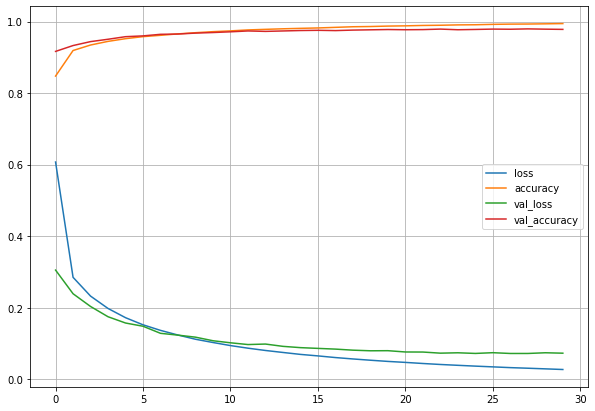

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [35]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9777


[0.07242404669523239, 0.9776999950408936]

In [36]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [37]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

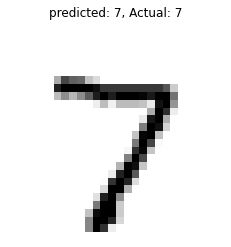

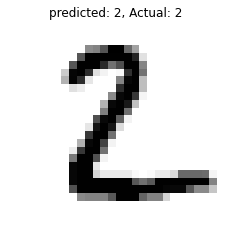

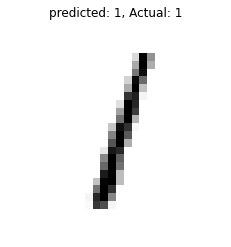

In [40]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()

In [39]:
model_clf.save("model.h5")

In [41]:
loaded_model = tf.keras.models.load_model("model.h5")

In [42]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9777


[0.07242404669523239, 0.9776999950408936]

In [43]:
y_pred = loaded_model.predict(X_test[:3])

In [44]:
y_pred

array([[7.3845047e-07, 4.2032025e-06, 2.9995237e-05, 7.6138414e-04,
        5.2498105e-08, 5.8143373e-06, 1.6077317e-10, 9.9916744e-01,
        2.3844159e-06, 2.8077540e-05],
       [2.7036560e-07, 9.9876052e-05, 9.9969828e-01, 1.9625589e-04,
        4.1341592e-12, 5.8204813e-07, 3.1035179e-06, 1.0367636e-11,
        1.6643872e-06, 1.0776595e-13],
       [2.1844369e-06, 9.9742979e-01, 9.5695234e-04, 4.7763002e-05,
        7.0874405e-05, 4.4856268e-05, 4.3597796e-05, 9.4937265e-04,
        4.4198983e-04, 1.2690634e-05]], dtype=float32)

In [45]:
np.argmax(y_pred, axis=-1)

array([7, 2, 1], dtype=int64)

<b>Theories

(i) data representation</b>

<b>1.rank 0 tensors : 

        scalar tensor have 0 axes(ndim==0)


2.vectors/rank 1 tensor: 

                a rank 1 tensor is said to have exactly only one axes 
    
3. rank 2 vectors : 
                 a matrix having 2 axes i.e rows nd columns 
                 
4. rank3 and higher rank tensors: 
                    
                    rank 3 can be visually seen as a cube of numbers </b>
                    
          
 <b> deep learning models don’t process an entire dataset at once; rather,they break the data into small batches.</b>
 
 <b>When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension.</b>
 
 real world exmaple : 
         like vector data,time series data,images,video 
     

<b>(ii)Geometric interpretation</b>

Translation: As you just saw, adding a vector to a point will move the point by a fixed amount in a fixed direction. 
Applied to a set of points (such as a 2D object), this is called a “translation”.

Rotation: A counterclockwise rotation of a 2D vector by an angle theta (see figure 2.10) can be achieved via a dot product with a 2 × 2 matrix
 
 
Scaling: A vertical and horizontal scaling of the image (see figure 2.11) can beachieved via a dot product with a 2 × 2 matrix 

Linear transform: A dot product with an arbitrary matrix implements a linear transform.
    
Affine transform: An affine transform is the combination of a linear transform and a translation. 
    
Dense layer with relu activation: An important observation about affine transforms is that if you apply many of them repeatedly, you still end up with an
affine transform

<b>(iii)Gradient based optimisation: 

            Gradient descent is the optimization technique that powers modern neural networks

 This happens within what’s called a training loop, which works as follows. 
 
 Repeat these steps in a loop, until the loss seems sufficiently low:
 
1 Draw a batch of training samples, x, and corresponding targets, y_true.

2 Run the model on x (a step called the forward pass) to obtain predictions, y_pred.

3 Compute the loss of the model on the batch, a measure of the mismatch between

y_pred and y_true.

4 Update all weights of the model in a way that slightly reduces the loss on this
batch



<b>(iv)derivative of a tensor operation</b>

The concept of derivation can be applied to any such function, as long as the surfaces they describe are continuous and smooth. 

The derivative of a tensor operation(or tensor function) is called a gradient.

Gradients are just the generalization of the concept of derivatives to functions that take tensors as inputs. 

In the same way, the gradient of a tensor function represents the curvature of the multidimensional surface described by the function. 

It characterizes how the output of the function varies when its input parameters vary.
 
Let’s look at an example grounded in machine learning. Consider: 

 An input vector, x (a sample in a dataset)

 A matrix, W (the weights of a model)

 A target, y_true (what the model should learn to associate to x)

 A loss function, loss (meant to measure the gap between the model’s current
predictions and y_true)


<b>(v)stochastic gradient descent </b>


If you update the weights in the opposite direction from the gradient, the loss will be a little less every time:
    
1 Draw a batch of training samples, x, and corresponding targets, y_true.

2 Run the model on x to obtain predictions, y_pred (this is called the forward pass)

3 Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.

4 Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).

5 Move the parameters a little in the opposite direction from the gradient

for example,W -= learning_rate * gradient—thus reducing the loss on the batch a bit. 

The learning rate (learning_rate here) would be a scalar factor modulating the “speed” of the gradient descent proces

<b>The term stochastic refers to the fact that each batch of data is drawn at random</b>

<b> Note: 
    
(i)it’s important to pick a reasonable value for the learning_rate factor.

If it’s too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum. 

If learning_rate is too large, your updates may end up taking you to completely random locations on the curve.
    
    
(ii) there exist multiple variants of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradients. 
    
There is, for instance, SGD with momentum, as well as Adagrad, RMSprop, and several others. 
    
Such variants are known as optimization methods or optimizers. 
    
In particular, the concept of momentum, which is used in many of these variants, deserves your attention. 
    
Momentum addresses two issues with SGD: convergence speed and local minima